In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import binned_statistic
df_1718 = pd.read_csv('data/2017-2018.csv',sep=',')

In [179]:
df_1718 = df_1718.iloc[:1000,:]

In [182]:
df_1718.sort_values(['Aggregate Sentence Length'])

,Race,Race Grouping,Gender,Age,Sentence Type,Aggregate Sentence Length,Marital Status,Religion
586,WHITE,Non Indigenous,MALE,49,DETERMINATE,730,SINGLE,CATH NON-SPEC
289,WHITE,Non Indigenous,MALE,25,DETERMINATE,730,COMMON LAW,CHRI NON SPEC
915,WHITE,Non Indigenous,MALE,23,DETERMINATE,730,SINGLE,CATH NON-SPEC
250,ASI-E/SOUTHEAST,Non Indigenous,MALE,25,DETERMINATE,730,SINGLE,NaN
752,ASIAN-SOUTH,Non Indigenous,MALE,39,DETERMINATE,730,UNKNOWN,HINDU
...,...,...,...,...,...,...,...,...
950,WHITE,Non Indigenous,MALE,57,DETERMINATE,11539,SINGLE,CATH NON-SPEC
487,WHITE,Non Indigenous,MALE,58,DETERMINATE,12428,SINGLE,CATH NON-SPEC
771,WHITE,Non Indigenous,MALE,48,DETERMINATE,13229,SINGLE,CATH NON-SPEC
580,WHITE,Non Indigenous,MALE,45,DETERMINATE,14222,SINGLE,MUSLIM


In [181]:
def preprocess(df):
    target_cols = ['Race','Race Grouping','Gender','Age','Sentence Type','Aggregate Sentence Length','Marital Status','Religion']
    df = df[target_cols]
    df = df[df['Sentence Type']=='DETERMINATE']
    return df
df_1718 = preprocess(df_1718)



ValueError: 'explode' must be of length 'x'

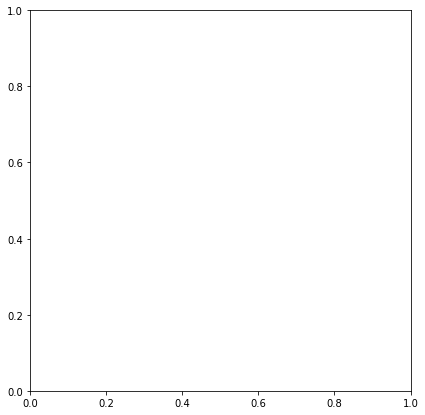

In [197]:
df_race = df_1718['Race'].value_counts()
x = df_race.index
y = df_race.values
make_pie(x,y)

In [199]:
def make_pie(x,y):
    # theme = plt.get_cmap('coolwarm')
    explode = ()*len(x)
    race_fig, race_ax = plt.subplots(figsize=(7, 7))

    # race_ax.set_prop_cycle("color", [theme(1. * i / len(y))
    #                              for i in range(len(y))])

    wedges, texts, autotexts = race_ax.pie(y, labels=x, explode=explode,autopct='%1.1f%%')
    percent = 100.*y/y.sum()
    labels = ['{0:5} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
    race_ax.legend(wedges,
                   labels,
                   title="Race Distribution Legend",
                   loc="center right",
                   bbox_to_anchor=(1.7, 0.5))
    race_ax.set_title('Race Distribution Pie Chart')

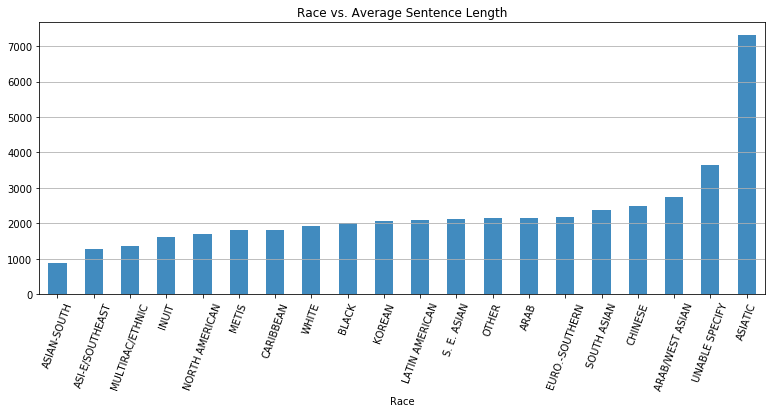

In [208]:
df_avg_sentence = df_1718.groupby(['Race'])['Aggregate Sentence Length'].mean().sort_values(ascending=True)
avg_sentence_bar = df_avg_sentence.plot(kind='bar',
                                        alpha=0.85,
                                        figsize=(13,5),
                                        rot=70,
                                        title = "Race vs. Average Sentence Length"
                                       ).grid(axis='y')

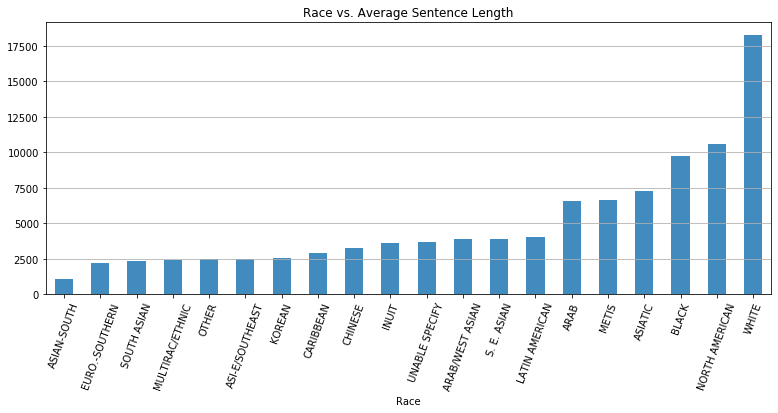

In [209]:
df_max_sentence = df_1718.groupby(['Race'])['Aggregate Sentence Length'].max().sort_values(ascending=True)
max_sentence_bar = df_max_sentence.plot(kind='bar',
                                        alpha=0.85,
                                        figsize=(13,5),
                                        rot=70,
                                        title = "Race vs. Average Sentence Length"
                                       ).grid(axis='y')